In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools

%matplotlib inline

#plt.rcParams['figure.figsize'] = [10,5]

# Set columns to full width
#pd.set_option('display.max_columns', None)  

df = pd.read_csv(".\\test.csv", encoding = "ISO-8859-1", dtype={'Subject': str} )
df['Subject'] = df['Subject'].astype(str) 
df['Received'] = pd.to_datetime(df['Received'],format='%m/%d/%Y %H:%M', errors='coerce')
df = df.dropna(subset=['Received'])
df['Date'] = df['Received']
df['Received'] = df['Received'].dt.date
df.set_index(df['Date'], inplace=True)

df.sort_values(by=['Received'], inplace=True)

df = df[~df.Subject.str.startswith('Conversation')]
df = df[~df.Subject.str.startswith('Synchronization Log')]
df = df[~df.Subject.str.startswith('Modification Resolution')]

in_df = df.query('Sender != "kenny.goh@3ds.com" and Sender != "Kenny.GOH@3ds.com"')
out_df = df.query('Sender == "Kenny.GOH@3ds.com" or Sender == "kenny.goh@3ds.com"')
in_df.sort_values(by=['Received'], inplace=True)
in_df.tail(100)




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Subject,Received,Sender,Body,Date
Date,,,,,
2019-06-10 23:36:00,Model Woolworths Production QAE health: EXCELL...,2019-06-10,NoReply_SHC@noreply.3ds.com,System report of Quintiq server on HS3-TSK-01\...,2019-06-10 23:36:00
2019-06-10 00:02:00,"Viva Acceptance - Model ""Vivaenergy"" health: E...",2019-06-10,kenny.goh@noreply.3ds.com,System report of Quintiq server on HS3-TSK-01\...,2019-06-10 00:02:00
2019-06-10 00:10:00,"[SHC] ""Fleetandcrewplannerkiwirail"" TEST QAE h...",2019-06-10,NoReply_SHC@noreply.3ds.com,System report of Quintiq server on HS3-QUI-TD0...,2019-06-10 00:10:00
2019-06-10 23:37:00,"Model Woolworths ""[Unknown]"" QAE health: EXCEL...",2019-06-10,WOOLWORTHS-TD-SHC@noreply.3ds.com,System report of Quintiq server on HS3-QUI-TD0...,2019-06-10 23:37:00
2019-06-10 00:23:00,"[SHC] ""Fleetandcrewplannerkiwirail"" TEST QAE h...",2019-06-10,NoReply_SHC@noreply.3ds.com,System report of Quintiq server on HS3-TSK-01\...,2019-06-10 00:23:00
2019-06-11 00:02:00,"Viva Acceptance - Model ""Vivaenergy"" health: E...",2019-06-11,kenny.goh@noreply.3ds.com,System report of Quintiq server on HS3-TSK-01\...,2019-06-11 00:02:00
2019-06-11 18:51:00,[CBH Planning] CKB Audit,2019-06-11,Stuart.LANCASTER@3ds.com,"Hi Kenny, \r\n\r\n \r\n\r\nCan you look at the...",2019-06-11 18:51:00
2019-06-11 09:02:00,Action Required - Customer Validation on SR005...,2019-06-11,IT.DSx-Client@3ds.com,********You receive this e-mail because you su...,2019-06-11 09:02:00
2019-06-11 11:12:00,RE: Scheduler Test Environment application ins...,2019-06-11,Pierre.BRAUN@3ds.com,"Hi Chris,\r\n\r\nWell complete the first mode...",2019-06-11 11:12:00


### Boxplot chart of Emails received per week day


<Figure size 1440x720 with 0 Axes>

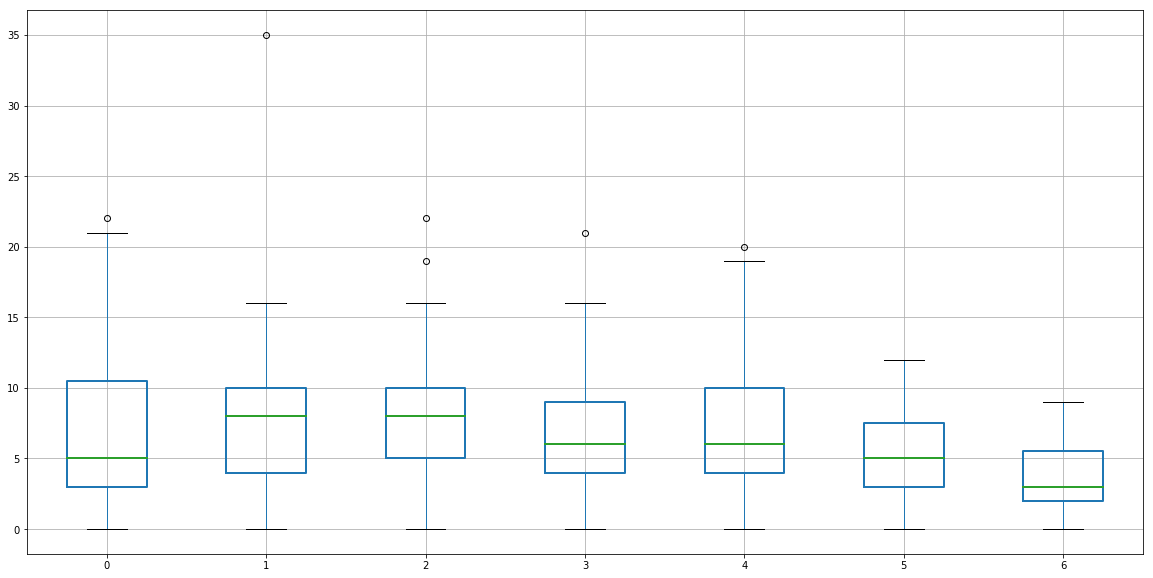

In [230]:
plt.figure(figsize=(20,10))
ts = in_df['Subject']
ts = ts.resample('D').count()
groups = ts.groupby([ts.index.dayofweek])
vals = []
for name, group in groups:
    vals.append(group[ts.index].dropna().tolist())

    
df2 = pd.DataFrame(vals)
plt.figure(figsize=(20,10))
df2 = df2.T
boxprops = dict(linestyle='-', linewidth=2, color='k')
medianprops = dict(linestyle='-', linewidth=2, color='R')
df2.boxplot( boxprops=boxprops, medianprops=medianprops) 

## Boxplot chart of emails received per time of day

<Figure size 1440x720 with 0 Axes>

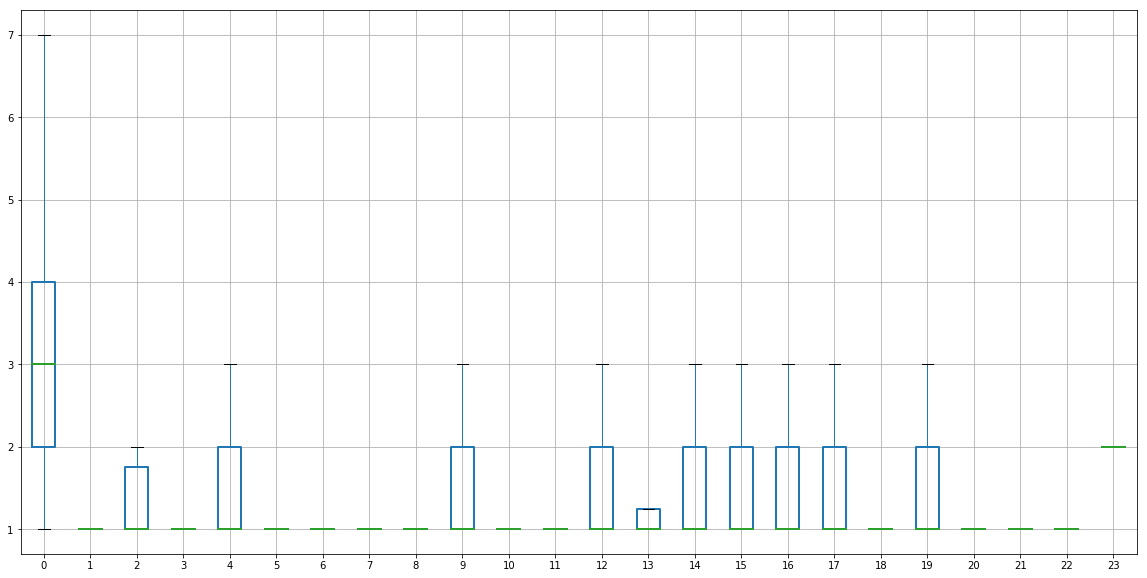

In [231]:

plt.figure(figsize=(20,10))
ts = in_df['Subject']
ts = ts.resample('H').count()
ts = ts[ts > 0]
groups = ts.groupby([ts.index.hour])
vals = []
for name, group in groups:
    vals.append(group[ts.index].dropna().tolist())
df2 = pd.DataFrame(vals)
plt.figure(figsize=(20,10))
df2 = df2.T
boxprops = dict(linestyle='-', linewidth=2, color='k')
medianprops = dict(linestyle='-', linewidth=2, color='R')
df2.boxplot(showfliers=False,boxprops=boxprops, medianprops=medianprops) 

## Boxplot chart of emails sent per week day

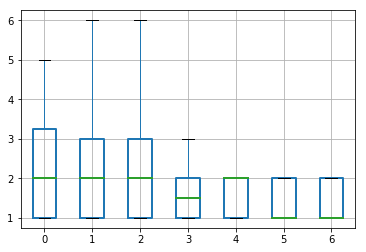

In [232]:

ts = out_df['Subject']
ts = ts.resample('D').count()
ts = ts[ts > 0]
groups = ts.groupby([ts.index.dayofweek])
vals = []
for name, group in groups:
    vals.append(group[ts.index].dropna().tolist())

df2 = pd.DataFrame(vals)
df2 = df2.T
boxprops = dict(linestyle='-', linewidth=2, color='k')
medianprops = dict(linestyle='-', linewidth=2, color='R')
df2.boxplot(showfliers=False, boxprops=boxprops, medianprops=medianprops) 

In [263]:
stacked = in_df['Subject']
stacked = stacked.resample('D').count()
stacked.describe()


count    329.000000
mean       6.595745
std        4.777116
min        0.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       35.000000
Name: Subject, dtype: float64

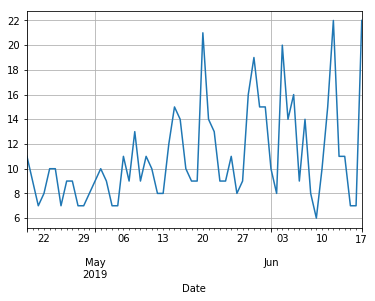

In [264]:
stacked = stacked.tail(60)
ax = stacked.plot(stacked=True, grid=True)
print('')

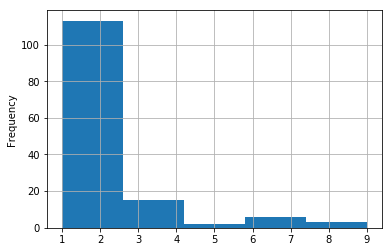

In [260]:
fig, ax = plt.subplots()
ts.plot.hist(ax=ax, bins=5, grid=True)
print('')

In [261]:
out_df['Subject'].resample('D').count().describe()

count    298.000000
mean       0.959732
std        1.499177
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: Subject, dtype: float64

## Top Senders

In [270]:

groups = in_df.drop(columns=['Received','Body','Date']).groupby(['Sender']).count()
result = groups.sort_values(by=['Subject'], ascending=False)
result['Avg'] = round(result['Subject'] / (max(df['Received']) -  min(df['Received'])).days,0)
result.sort_values(by=['Subject'], ascending=False)
result.head(10)


,Subject,Avg
Sender,,
Quintiq.ANZ.SystemHealthCheck@3ds.com,505,2.0
NoReply_SHC@noreply.3ds.com,304,1.0
IT.News@corp.3ds.com,258,1.0
kenny.goh@noreply.3ds.com,206,1.0
QUINTIQ.Support@3ds.com,123,0.0
sales.otc-news@3ds.com,95,0.0
WOOLWORTHS-TD-SHC@noreply.3ds.com,93,0.0
Rohit.TANGRI@3ds.com,49,0.0
LeeHaw.ONG@3ds.com,34,0.0


In [238]:
(max(df['Received']) -  min(df['Received'])).days


328

Slope 0.019627709103956125
NRMSE: 0.12403177281424557


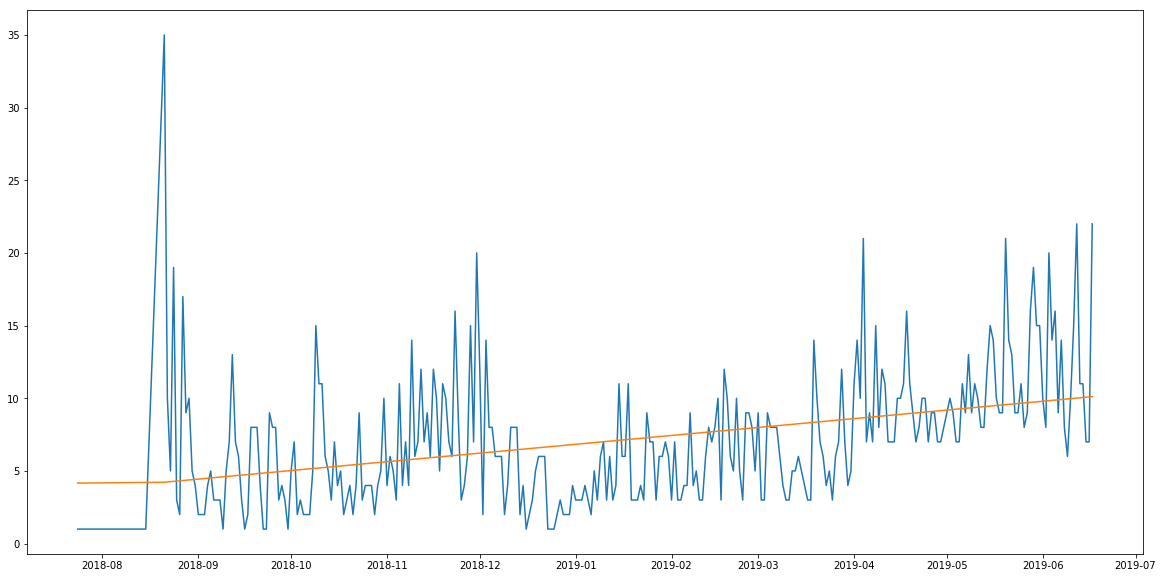

In [269]:
ts = in_df['Subject']
ts = ts.resample('D').count()
ts = ts[ts > 0]

coefficients, residuals, _, _, _ = np.polyfit(range(len(ts.index)),ts,1,full=True)
mse = residuals[0]/(len(ts.index))
nrmse = np.sqrt(mse)/(ts.max() - ts.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

ts4 = pd.DataFrame(ts)
trend = [coefficients[0]*x + coefficients[1] for x in range(len(ts4))]
ts4['trend']=trend

plt.figure(figsize=(20,10))
plt.plot(ts4)
plt.show()